## MMSB: Cocktails

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

pd.options.display.max_columns = 30

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/all_our_ideas/4446/dat.csv', header=None)
text = pd.read_csv('../data/all_our_ideas/4446/text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,3,19,1,eea76a93a91feaed66e55cae0db062f6
1,8,16,0,eea76a93a91feaed66e55cae0db062f6
2,7,13,1,eea76a93a91feaed66e55cae0db062f6
3,13,14,0,eea76a93a91feaed66e55cae0db062f6
4,15,19,0,eea76a93a91feaed66e55cae0db062f6


In [3]:
X = data[[0,1,2]].values
X.shape

(340, 3)

In [4]:
max(X[:,1]) # V

20

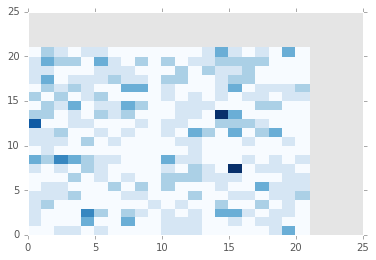

In [5]:
I = pd.DataFrame(utils.get_interactions(X))
plt.pcolor(I, cmap='Blues')

0:00:01.019068


(-261.91332231763795, -261.91332231763795)

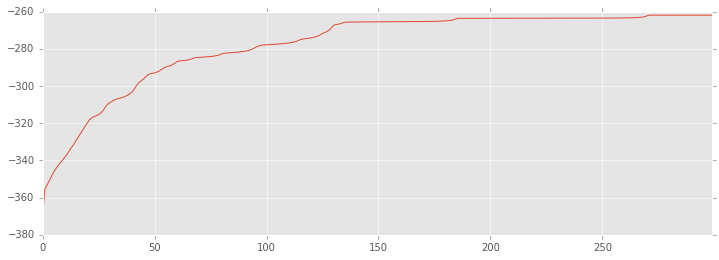

In [6]:
K = 3
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

In [7]:
pd.DataFrame(gamma).idxmax().value_counts()

2    9
0    8
1    4
dtype: int64

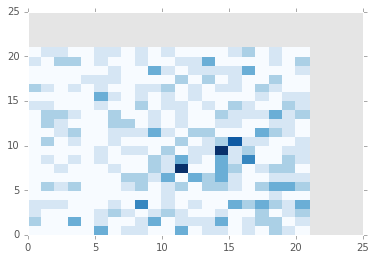

In [8]:
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

### B (interaction probabilities)

In [15]:
pd.DataFrame(B).round(3)

,0,1,2
0,0.500,0.725,0.687
1,0.275,0.500,0.671
2,0.313,0.329,0.500


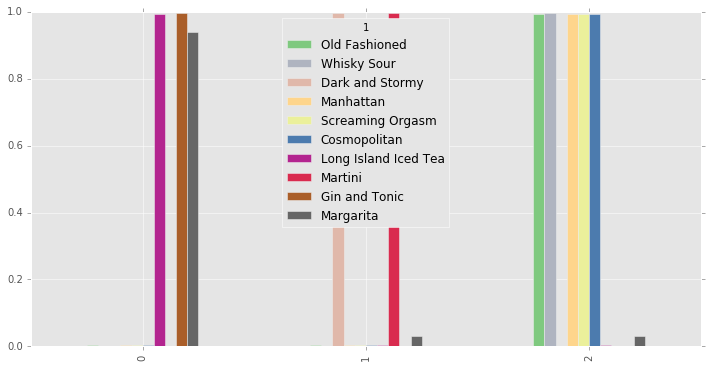

In [16]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:30]))
gamma_df.iloc[:10].T.plot(kind='bar', cmap='Accent', figsize=[12,6])

In [23]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:50]))

def show_prototypes(ptype):
    return gamma_df[ptype][gamma_df[ptype] > .5].sort_values(ascending=False)

In [24]:
show_prototypes(0)

1
Flaming Dr. Pepper      0.995156
Gin and Tonic           0.994636
White Russian           0.994333
Bloody Mary             0.994167
Pina Colada             0.993397
Long Island Iced Tea    0.992092
Vodka and Red Bull      0.991029
Margarita               0.939375
Name: 0, dtype: float64

In [25]:
show_prototypes(1)

1
Kamikaze           0.995484
Dark and Stormy    0.994909
Martini            0.994489
Rum and Coke       0.994489
Name: 1, dtype: float64

In [26]:
show_prototypes(2)

1
Orgasm              0.995380
Whisky Sour         0.994636
Screaming Orgasm    0.993992
Cosmopolitan        0.993992
Old Fashioned       0.993806
Moscow Mule         0.993172
Manhattan           0.992931
Irish Coffee        0.682840
Screwdriver         0.533365
Name: 2, dtype: float64